In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Linear SVM Classification

In [3]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris

In [4]:
iris = load_iris(as_frame=True)

In [5]:
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = (iris.target == 2)

svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C = 1, loss = 'hinge', random_state=42))

In [6]:
svm_clf.fit(X,y)
svm_clf.predict([[5.5, 1.7],[5.0,1.5]])

array([ True, False])

In [7]:
svm_clf.decision_function([[5.5, 1.7],[5.0,1.5]])

array([ 0.68560988, -0.40718623])

Increase C to shrink the street but too much will overfit the data. However, decreasing C will widen the street but too much will underfit the data.<br><br>

By default, LinearSVC uses 'squared_hinge' loss while SGDClassifier uses 'hinge' loss.

# Nonlinear SVM Classification

### Adding polynomial features

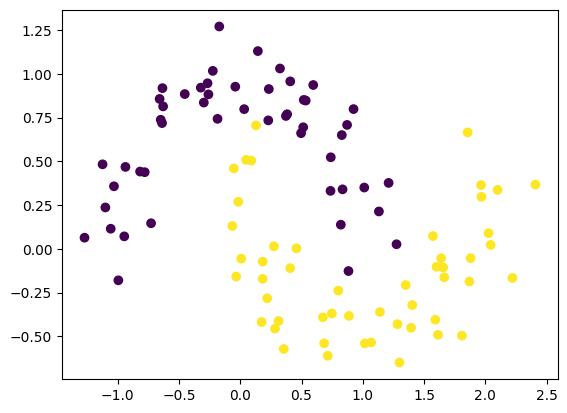

In [67]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

poly_features_svc = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C = 10, max_iter=10_000, random_state=42)
)

poly_features_svc.fit(X,y)

plt.scatter(x=X[:,0], y=X[:,1], c = y)

### Kernel trick: linear kernel
This method is equivalent to LinearSVC

### Kernel trick: polynomial kernel

This method allows us to get the same result as adding polynomial features without actually adding polynomial features.

In [69]:
from sklearn.svm import SVC

poly_kernel_svc = make_pipeline(StandardScaler(),
                                SVC(kernel='poly', degree = 3, coef0 = 1, C = 5))

poly_kernel_svc.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

Greater degree will overfit the data.<br>
Coef0 controls how much the model is influenced by high-degree terms versus low-degree terms.

### Kernel trick: similarity kernel

Just put kernel = 'rbf' to perform Gaussian rbf kernel. Rbf kernel adds many similarity features (all training instances becomes a landmark) but this particular method does the same job without actually doing it. LOL!<br><br>

Add hyperparameter 'gamma'. Increasing gamma will make the curve narrower. Hence overfitting the data.

# Linear SVM Regression

SVM regression tries to fit as many instances as possible on the street while limiting margin violations (i.e., instances off the street). The width of the street is controlled by a hyperparameter, epsilon (ε).  The greater the ε, the wider the street.

In [72]:
from sklearn.svm import LinearSVR

# use a linear dataset
svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=0.5, random_state=42))

# Nonlinear SVM Regression: kernel trick

In [73]:
from sklearn.svm import SVR

# use a quadratic or any other non-linear dataset

svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel='poly', degree=2, C = 0.01, epsilon=0.1))